In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
!pip install mdtraj
import mdtraj as md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl size=7547287 sha256=d16581700e8c3bb6424c86a6daee7ed97173a66c3be5b1c835f250c8d909897f
  Stored in directory: /root/.cache/pip/wheels/4b/4e/d5/22b44e04aca0780281ffb43717ebb3404bc1a77cf8f345fa73
Successfully built mdtraj


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/AF2RAVE-Glide/kinase_Aloop')
import kinaseCVs as kcv
import os

In [3]:
os.chdir("/content/drive/MyDrive/AF2RAVE-Glide/")

**RMSD filter for rAF2 DDR1**

In [ ]:
temp = f'rAF2/DDR1/DDR1_MSA16/pred_1.pdb'
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/DDR1/DDR1_MSA16/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

In [ ]:
temp = f'rAF2/DDR1/DDR1_MSA16/pred_1.pdb'
rmsd_row2 = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/DDR1/DDR1_MSA8/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row2.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

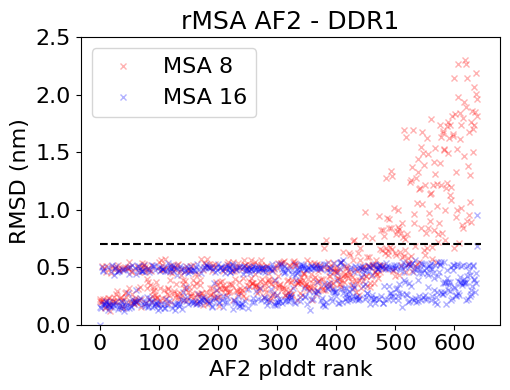

In [ ]:
rmsd_cutoff = 0.7
fig=plt.figure(figsize=(5.2,4))
plt.plot(rmsd_row2, 'rx', alpha=0.3, label='MSA 8', markersize=5)
plt.plot(rmsd_row, 'bx', alpha=0.3, label='MSA 16', markersize=5)
plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"rMSA AF2 - DDR1", fontsize=18)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/DDR1_rAF2_RMSD_filter",dpi=300)

In [ ]:
inputline1 =" ".join([f"rAF2/DDR1/DDR1_MSA16/pred_{i+1}.pdb" for i in range(len(rmsd_row)) if rmsd_row[i] < rmsd_cutoff])
inputline2 =" ".join([f"rAF2/DDR1/DDR1_MSA8/pred_{i+1}.pdb" for i in range(len(rmsd_row2)) if rmsd_row2[i] < rmsd_cutoff])
os.system(f"mdconvert {inputline1} {inputline2} -o rAF2/DDR1/DDR1_AF2.xtc")

In [ ]:
RMSDs = [rmsd_row[i] for i in range(len(rmsd_row)) if rmsd_row[i] < rmsd_cutoff]
RMSDs.extend([rmsd_row2[i] for i in range(len(rmsd_row2)) if rmsd_row2[i] < rmsd_cutoff])
RMSDs=np.array(RMSDs).reshape(-1)

**Clustering rAF2 to select initial structures for AF2RAVE**

In [ ]:
from kinase_Aloop.kinaseCVs import resids_DDR1

In [ ]:
traj = md.load("rAF2/DDR1/DDR1_AF2.xtc", top='rAF2/DDR1/DDR1_MSA16/pred_1.pdb')
cv = kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)

In [ ]:
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
centers,listindices=kcv.RegSpaceClustering(CVs,0.82,max_centers=50, batch_size=50,randomseed=1)
t_af2=kcv.getdunbrack12(CVs)
t_cluster=kcv.getdunbrack12(centers.T)

Found 18 centers!


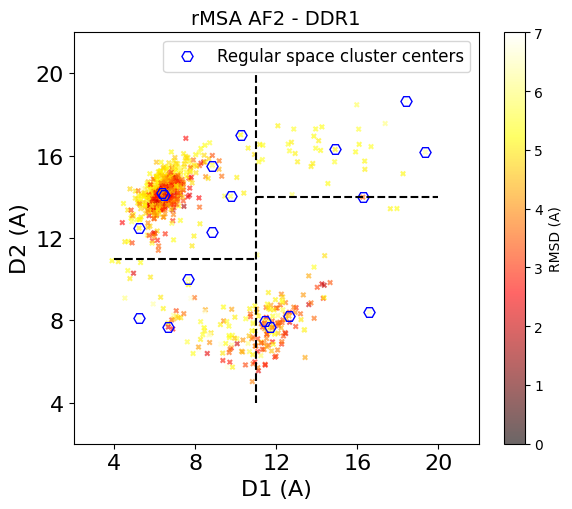

In [ ]:
fig=plt.figure(figsize=(6,5.2))
plt.scatter(t_af2[0]*10,t_af2[1]*10, marker='x', c=10*RMSDs, s=10*np.ones(len(RMSDs)), alpha=0.6, cmap='hot',vmax=7);
plt.plot(t_cluster[0]*10,t_cluster[1]*10,"H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="Regular space cluster centers");
plt.colorbar(label="RMSD (A)")
plt.vlines(11, 4, 20, linestyles='dashed', color='k')
plt.hlines(11, 4, 11, linestyles='dashed', color='k')
plt.hlines(14, 11, 20, linestyles='dashed', color='k')

plt.xlim(2,22)
plt.ylim(2,22)
plt.xlabel('D1 (A)', fontsize=16)
plt.ylabel('D2 (A)', fontsize=16)
plt.xticks(np.arange(4,24,4), fontsize=16)
plt.yticks(np.arange(4,24,4), fontsize=16)
plt.title(f"rMSA AF2 - DDR1", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/DDR1_rAF2_cluster",dpi=300)

In [ ]:
df = pd.DataFrame()
df['frame'] = range(len(cv.traj(0)))
df['RMSD'] = RMSDs
for i in range(len(cv.allcvs)):
    df[cv.cvname(i)] = cv.allcvs[i].traj

In [ ]:
rows = []
for frame_idx in listindices:
    rows.append(frame_idx-1)
c_df = pd.DataFrame(df.iloc[rows])

In [ ]:
out_df = c_df[(c_df[c_df.columns[-3]] > 1.1) & (c_df[c_df.columns[-2]] < 1.4)]
sorted_df = out_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

943
1102


In [ ]:
inter_df = c_df[(c_df[c_df.columns[-3]] < 1.1) & (c_df[c_df.columns[-2]] < 1.1)]
sorted_df = inter_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

888
1074


In [ ]:
in_df = c_df[(c_df[c_df.columns[-3]] < 1.1) & (c_df[c_df.columns[-2]] > 1.1)]
sorted_df = in_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

1
122


add initial structures with Aloop folded

In [ ]:
sb = kcv.SB_chodera(resids_DDR1, traj.top, traj)

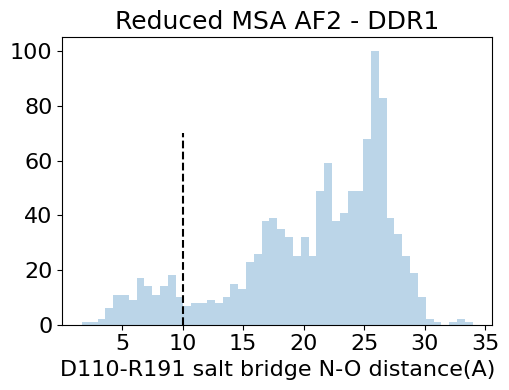

In [ ]:
fig=plt.figure(figsize=(5.2,4))
plt.hist(sb.traj*10, alpha=0.3, bins=50)
plt.vlines(10, 0, 70, 'k', linestyles='dashed')
plt.xlabel('D110-R191 salt bridge N-O distance(A)', fontsize=16)
#plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"Reduced MSA AF2 - DDR1", fontsize=18)
plt.tight_layout()

In [ ]:
sCVs = []
rmsds= []
frames=[]
sbs=[]
for i in range(len(sb.traj)):
    if sb.traj[i] < 1 :
        sCVs.append(CVs[i])
        rmsds.append(RMSDs[i])
        frames.append(i)
        sbs.append(sb.traj[i])
sCVs = np.array(sCVs)
rmsds = np.array(rmsds)

In [ ]:
centers,listindices=kcv.RegSpaceClustering(sCVs,0.7,max_centers=50, batch_size=50,randomseed=1)

Found 11 centers!


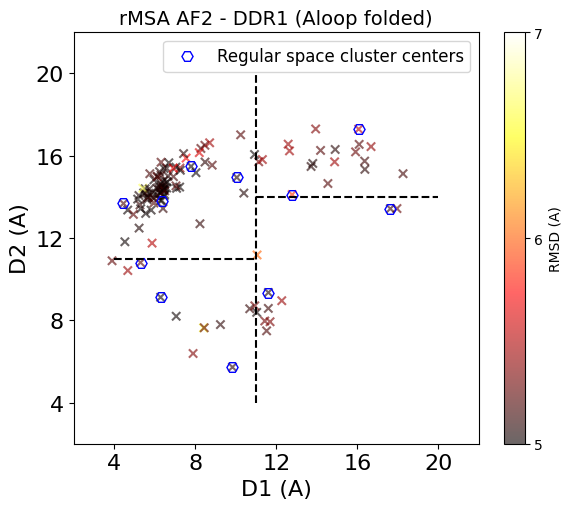

In [ ]:
fig=plt.figure(figsize=(6,5.2))
t_af2=kcv.getdunbrack12(sCVs)
t_cluster=kcv.getdunbrack12(centers.T)

plt.scatter(t_af2[0]*10,t_af2[1]*10, marker='x', c=10*rmsds, alpha=0.6, cmap='hot', vmin=5, vmax=7);
plt.plot(t_cluster[0]*10,t_cluster[1]*10,"H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="Regular space cluster centers")
plt.vlines(11, 4, 20, linestyles='dashed', color='k')
plt.hlines(11, 4, 11, linestyles='dashed', color='k')
plt.hlines(14, 11, 20, linestyles='dashed', color='k')
plt.colorbar(label="RMSD (A)",ticks=[5,6,7])
plt.xlim(2,22)
plt.ylim(2,22)
plt.xlabel('D1 (A)', fontsize=16)
plt.ylabel('D2 (A)', fontsize=16)
plt.xticks(np.arange(4,24,4), fontsize=16)
plt.yticks(np.arange(4,24,4), fontsize=16)
plt.title(f"rMSA AF2 - DDR1 (Aloop folded)", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/DDR1_rAF2_cluster_afolded",dpi=300)

In [ ]:
df = pd.DataFrame()
df['frame'] = frames
df['RMSD'] = rmsds
df['SB'] = sbs
for i in range(len(cv.allcvs)):
    df[cv.cvname(i)] = sCVs[:,i]

In [ ]:
rows = []
for frame_idx in listindices:
    rows.append(frame_idx-1)
c_df = pd.DataFrame(df.iloc[rows])

In [ ]:
out_df = c_df[(c_df[c_df.columns[-3]] > 1.1) & (c_df[c_df.columns[-2]] < 1.4)]
sorted_df = out_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

inter_df = c_df[(c_df[c_df.columns[-3]] < 1.1) & (c_df[c_df.columns[-2]] < 1.1)]
sorted_df = inter_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

in_df = c_df[(c_df[c_df.columns[-3]] < 1.1) & (c_df[c_df.columns[-2]] > 1.1)]
sorted_df = in_df.sort_values(by='RMSD')
for i in range(2):
    frame_idx = int(sorted_df.iloc[i]['frame']) + 1
    # frame = traj[frame_idx-1]
    # frame_pdb_file = f'rAF2/DDR1/ini_md/ini_{frame_idx}.pdb'
    # frame.save_pdb(frame_pdb_file)
    print(frame_idx)

916
644
459
961
776
4


**RMSD filter for rAF2 Abl1**

In [ ]:
temp = f'rAF2/Abl1/Abl1_MSA16/pred_1.pdb'
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/Abl1/Abl1_MSA16/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

In [ ]:
temp = f'rAF2/Abl1/Abl1_MSA16/pred_1.pdb'
rmsd_row2 = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/Abl1/Abl1_MSA8/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row2.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

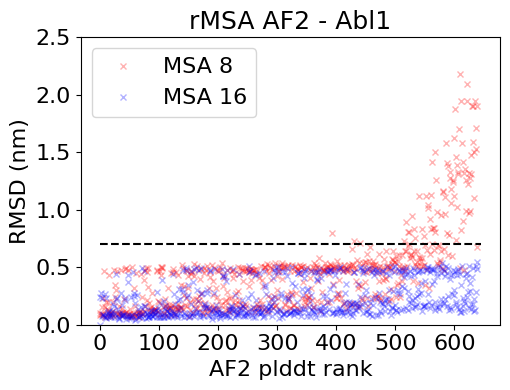

In [ ]:
rmsd_cutoff = 0.7
fig=plt.figure(figsize=(5.2,4))
plt.plot(rmsd_row2, 'rx', alpha=0.3, label='MSA 8', markersize=5)
plt.plot(rmsd_row, 'bx', alpha=0.3, label='MSA 16', markersize=5)
plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"rMSA AF2 - Abl1", fontsize=18)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/Abl1_rAF2_filter",dpi=300)

In [ ]:
inputline1 =" ".join([f"rAF2/Abl1/Abl1_MSA16/pred_{i+1}.pdb" for i in range(len(rmsd_row)) if rmsd_row[i] < rmsd_cutoff])
inputline2 =" ".join([f"rAF2/Abl1/Abl1_MSA8/pred_{i+1}.pdb" for i in range(len(rmsd_row2)) if rmsd_row2[i] < rmsd_cutoff])
os.system(f"mdconvert {inputline1} {inputline2} -o rAF2/Abl1/Abl1_AF2.xtc")

0

**RMSD filter for rAF2 srcK**

In [4]:
temp = f'rAF2/srcK/src_16MSA_0/pred_1.pdb'
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/srcK/src_16MSA_0/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

In [5]:
temp = f'rAF2/srcK/src_16MSA_0/pred_1.pdb'
rmsd_row2 = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

for jj in range(1,641):
    print(f"Processing pred_{jj} ...")
    structure2 = md.load(f'rAF2/srcK/src_8MSA_0/pred_{jj}.pdb')
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row2.append(rmsd)

Processing pred_1 ...
Processing pred_2 ...
Processing pred_3 ...
Processing pred_4 ...
Processing pred_5 ...
Processing pred_6 ...
Processing pred_7 ...
Processing pred_8 ...
Processing pred_9 ...
Processing pred_10 ...
Processing pred_11 ...
Processing pred_12 ...
Processing pred_13 ...
Processing pred_14 ...
Processing pred_15 ...
Processing pred_16 ...
Processing pred_17 ...
Processing pred_18 ...
Processing pred_19 ...
Processing pred_20 ...
Processing pred_21 ...
Processing pred_22 ...
Processing pred_23 ...
Processing pred_24 ...
Processing pred_25 ...
Processing pred_26 ...
Processing pred_27 ...
Processing pred_28 ...
Processing pred_29 ...
Processing pred_30 ...
Processing pred_31 ...
Processing pred_32 ...
Processing pred_33 ...
Processing pred_34 ...
Processing pred_35 ...
Processing pred_36 ...
Processing pred_37 ...
Processing pred_38 ...
Processing pred_39 ...
Processing pred_40 ...
Processing pred_41 ...
Processing pred_42 ...
Processing pred_43 ...
Processing pred_44 .

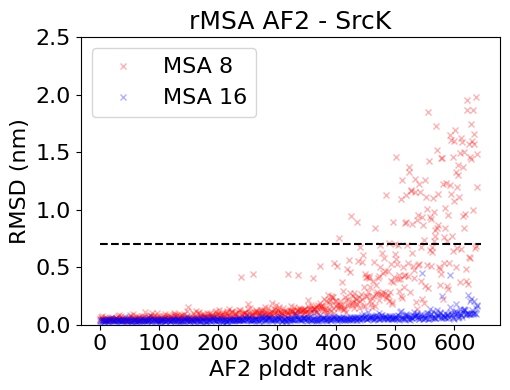

In [6]:
rmsd_cutoff = 0.7
fig=plt.figure(figsize=(5.2,4))
plt.plot(rmsd_row2, 'rx', alpha=0.3, label='MSA 8', markersize=5)
plt.plot(rmsd_row, 'bx', alpha=0.3, label='MSA 16', markersize=5)
plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"rMSA AF2 - SrcK", fontsize=18)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/SrcK_rAF2_filter",dpi=300)

In [7]:
inputline1 =" ".join([f"rAF2/srcK/src_16MSA_0/pred_{i+1}.pdb" for i in range(len(rmsd_row)) if rmsd_row[i] < rmsd_cutoff])
inputline2 =" ".join([f"rAF2/srcK/src_8MSA_0//pred_{i+1}.pdb" for i in range(len(rmsd_row2)) if rmsd_row2[i] < rmsd_cutoff])
os.system(f"mdconvert {inputline1} {inputline2} -o rAF2/srcK/srcK_AF2.xtc")

0